## welcome to data science wednesday
### this is our no-experience-neccessary guided project

*the data* ~ **Video Game Sales with Ratings**

*features* ~

* **Name - The game's name**
* **Platform - Platform of the games release**
* **Year_of_Release - Year of the game's release**

* **Genre - Genre of the game**

* **Publisher - Publisher of the game**

* **NA_Sales - Sales in North America (in millions)**

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales (in millions)

* **Critic_score - Aggregate score compiled by Metacritic staff**

* Critic_count - The number of critics used in coming up with the critic score

* User_score - Score by Metacritic's subscribers

* User_count - Number of users who gave the user score

* Rating - The ESRB ratings



### first thing's first 

don't forget libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chartify
import warnings
warnings.filterwarnings('ignore')

In [60]:
video_game_sales = pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')
video_game_sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN


### now we do eda! 

_eda_ ~ exploratory data analysis

without eda, there is no project. 

a goal is nice though. this guided project is looking to answer the question:

**of the video games in this dataset, what drove higher sales?**

In [61]:
# a little bit of cleaning

with_ratings = video_game_sales.loc[~video_game_sales['Critic_Score'].isnull(),:]

new_and_relevant = with_ratings.loc[ 
    
            (with_ratings['Year_of_Release'] > 2010) 
          & (with_ratings['Publisher'].str.contains(
                  'Nintendo|Activision|Ubisoft|Bethesda Softworks|THQ|LucasArts|Sega'))]

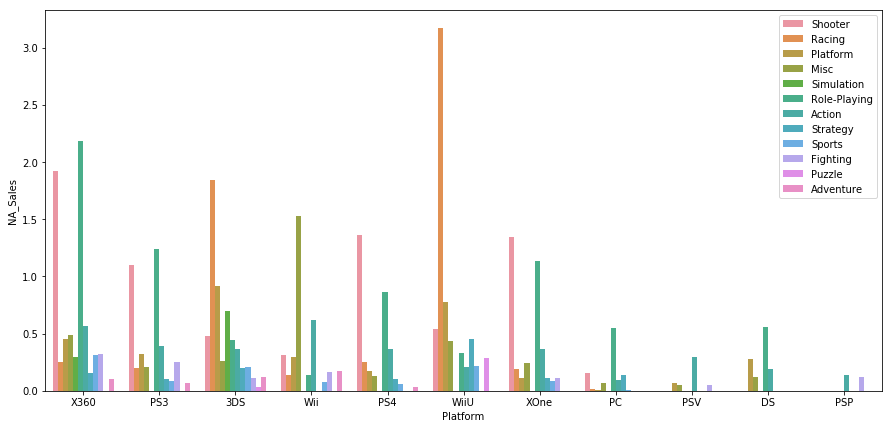

In [62]:
plt.figure(figsize=(15,7))
ax = plt.subplot()
sns.barplot(x='Platform', y='NA_Sales', hue='Genre', ci=None,
             data=new_and_relevant)

ax.legend(loc=1)
plt.show()

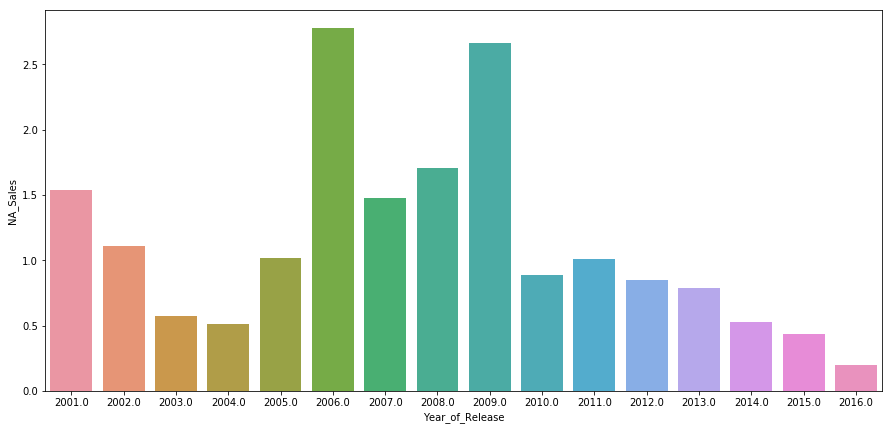

In [105]:
plt.figure(figsize=(15,7))
ax = plt.subplot()

sns.barplot(x='Year_of_Release', y='NA_Sales', ci=None,
                data=with_ratings.loc[
                with_ratings['Publisher'] == 'Nintendo']
               .groupby('Year_of_Release').mean().reset_index())

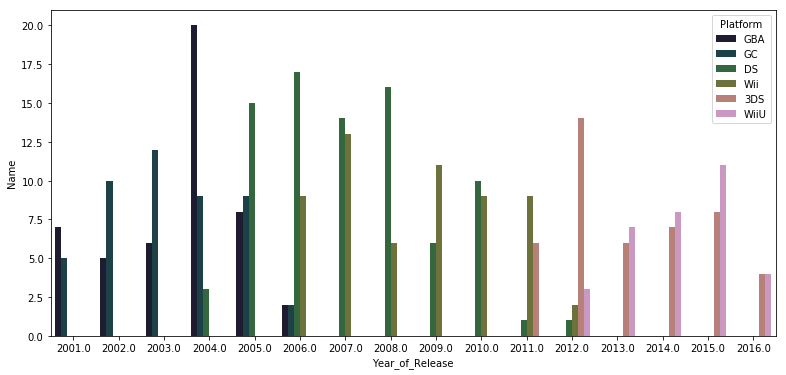

In [106]:
sns.set_palette("cubehelix", 8)
fig = plt.figure(figsize=(13,6))
ax = plt.subplot()


sns.barplot(x='Year_of_Release', y='Name', hue='Platform', 
            data=with_ratings.loc[with_ratings['Publisher'] == 'Nintendo'].groupby(
            ['Year_of_Release', 'Platform']).count().reset_index())

plt.show()